# Logistic Regression

## Agenda

1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Pros and cons of logistic regression

**Classification techniques** are an essential part of machine learning and data mining applications. Approximately 70% of problems in Data Science are classification problems. There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable. For example, IRIS dataset a very famous example of multi-class classification. Other examples are classifying article/blog/document category.

**Logistic Regression** is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

## Part 1: Predicting a Continuous Response

[Data Source](https://archive.ics.uci.edu/ml/datasets/glass+identification)


In [2]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id', 'ri', 'na', 'mg', 'al',
             'si', 'k', 'ca', 'ba', 'fe', 'glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values(by=['al'], inplace=True)
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1
184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6
110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2
158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3
153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3


**Question:** Pretend that we want to predict **ri**, and our only feature is **al**. How could we do it using machine learning?

**Answer:** We could frame it as a regression problem, and use a linear regression model with **al** as the only feature and **ri** as the response.

**Question:** How would we **visualize** this model?

**Answer:** Create a scatter plot with **al** on the x-axis and **ri** on the y-axis, and draw the line of best fit.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

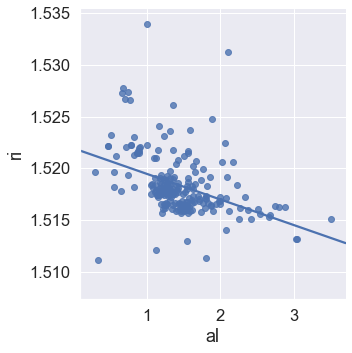

In [4]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

plt.show()

# sns.lmplot(x='al', y='ri', data=glass, ci=None, col = 'glass_type', col_wrap=2)


### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
linreg = LinearRegression().fit(glass.al.values.reshape(-1, 1), glass.ri)
# compute prediction for al=2 using the predict method
linreg.predict(np.array([[2]]))

array([1.51699012])

In [6]:
#compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([1.51699012])

## Part 2: Predicting a Categorical Response

In [7]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [8]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


Let's change our task, so that we're predicting **household** using **al**. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'household')

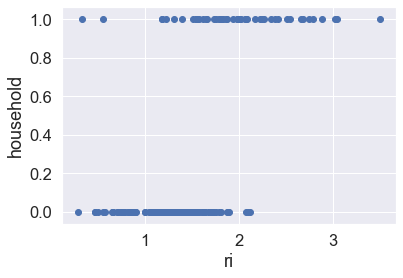

In [9]:
plt.scatter(glass.al, glass.household)
plt.xlabel('ri')
plt.ylabel('household')

Let's draw a **regression line**, like we did before:

In [10]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)

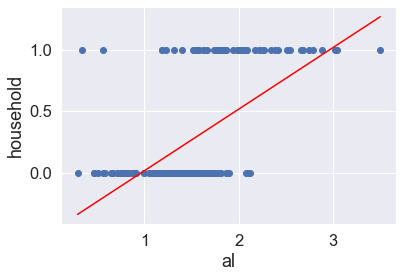

In [11]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

If **al=3**, what class do we predict for household? 

If **al=1.5**, what class do we predict for household?

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [12]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.sample(n=15, random_state=2)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
63,1.52172,13.51,3.86,0.88,71.79,0.23,9.54,0.00,0.11,1,0,-0.044800,0
141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2,0,0.321059,0
196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,0.05,7,1,0.857318,1
162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3,0,-0.109953,0
50,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.00,0.00,1,0,0.130612,0
76,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2,0,0.270941,0
78,1.51627,13.00,3.58,1.54,72.83,0.61,8.04,0.00,0.00,2,0,0.285976,0
85,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2,0,0.556612,1
121,1.51844,13.25,3.76,1.32,72.40,0.58,8.42,0.00,0.00,2,0,0.175717,0


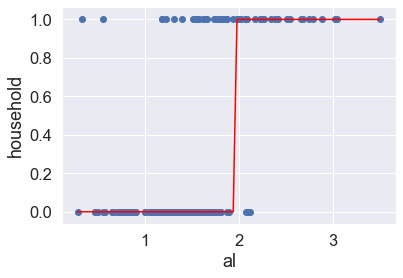

In [13]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

plt.show()

## Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did:

In [14]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9, solver='lbfgs')
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

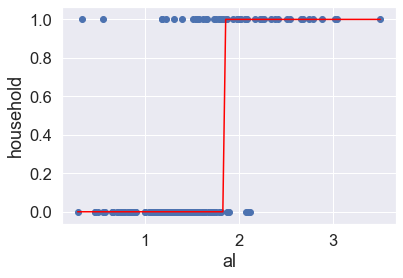

In [15]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [16]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

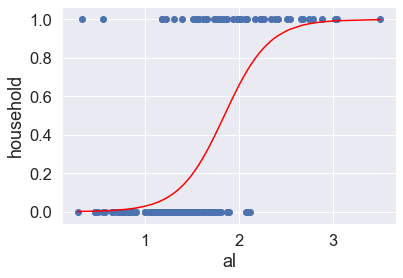

In [17]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

In [18]:
glass['new_pred'] = np.where(glass.household_pred_prob < 0.4, 0,1)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob,new_pred
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0,0.001499,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0,0.001847,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.003176,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.003176,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0,0.003752,0


In [ ]:
logreg.predict()

In [19]:
# examine some example predictions
print(logreg.predict_proba(np.array([[1]])))
print(logreg.predict_proba(np.array([[2]])))
print(logreg.predict_proba(np.array([[3]])))

[[0.97161741 0.02838259]]
[[0.34361466 0.65638534]]
[[0.00794181 0.99205819]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

## Part 4: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [66]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [67]:
# exponential function: e^1
np.exp(1)

2.718281828459045

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [68]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.999896315728952

It is also the **inverse** of the exponential function:

In [69]:
np.log(np.exp(5))

5.0

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob,new_pred
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0,0.001499,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0,0.001847,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.003176,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.003176,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0,0.003752,0


In [78]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)



## Part 5: What is Logistic Regression?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.



The equation can be rearranged into the **logistic function**:

$$p = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$



In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1
- We will maximize likelihood function $$ \ell(\beta_{0}, \beta_{1}) = \prod_{i: y_1 =1} p(x_i)\prod_{i^{\prime}: y_{i^{\prime}}=0} (1- p(x_{i}))$$ 

to find $\beta_{0}$ and $\beta_{1}$


[Least squares vs ML](https://stats.stackexchange.com/questions/143705/maximum-likelihood-method-vs-least-squares-method)

We have covered how this works for **binary classification problems** (two response classes). But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**): decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

In [98]:
# # add log-odds to the table
# glass['logodds'] = glass.household_pred_prob.map(lambda x: x/(1-x))

# plt.plot(glass.al, np.log(glass.logodds))

## Part 6: Interpreting Logistic Regression Coefficients

Text(0, 0.5, 'household')

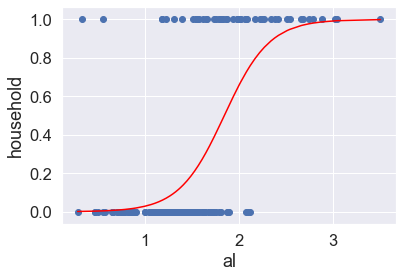

In [84]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [85]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([0.64722717])

In [86]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([1.91023671])

In [87]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.65638534])

In [88]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(np.array([[2]]))[:, 1]

array([0.65638534])

In [126]:
# examine the coefficient for al
list(zip(feature_cols, logreg.coef_[0]))

[('al', 4.427463526494322)]

**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [127]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9920580839167457

In [128]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(np.array([[3]]))[:, 1]

array([0.99998902])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [129]:
# examine the intercept
logreg.intercept_

array([-1.86253327])

In [130]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.13440805])

That makes sense from the plot above, because the probability of household=1 should be very low for such a low 'al' value.

<img src='resources/logistic_betas.png' width=700/>

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 8: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions

#### Logistic regression on the whole dataset

In [132]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class,household_pred_prob,high_ba
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0,0.359262,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0,0.411639,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.554378,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0,0.554378,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0,0.597600,0


In [92]:
y = glass.household.values

X = glass.drop(columns= ['glass_type', 'household']).values


In [93]:
log_model = LogisticRegression(C = 1e9)

log_model.fit(X,y)

log_model.score(X,y)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9485981308411215

In [94]:
from sklearn.metrics import roc_curve


In [95]:
y_pred = log_model.predict(X)

In [96]:
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y, y_pred)

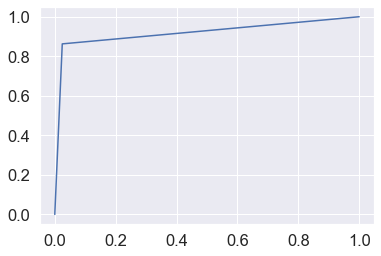

In [97]:
plt.plot(fpr_rt_lm, tpr_rt_lm)
plt.show()

[A video that explains ROC](https://www.youtube.com/watch?v=OAl6eAyP-yo)